# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [48]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [49]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [50]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [51]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return 2*x*numpy.sin(x)+(2-x**2)*numpy.cos(x)-2

Check your solution with the same numpy array:

In [ ]:
assert g(0) == 0.

In [52]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [53]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    integral_xmin = g(xmin)
    integral_xmax = g(xmax)
    return integral_xmax - integral_xmin

Check your analytic function:

In [54]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [82]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    #YOUR CODE HERE
    dx = (xmax - xmin)/N
    total = f(xmin) + f(xmax)
    for i in range(2, 2*N +1):
        if i % 2 == 0:
            #midpoint works
            total = total + 4*f(xmin + (i-1)*dx/2)
        else:  
            #broken
            total = total + 2*f(xmin + (i-1)*dx*0.5)
    print((dx/6)*total)
    return (dx/6)*total

#integrate_numeric(1,5,4)
    

            

Make sure you have implemented Simpson's rule correctly:

In [76]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

1.6266126028560373


In [78]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

1.096590995599109


## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


2.4690909838319284
2.4694592002574316
2.4694818744619678
2.469483286359016
2.4694833745209315
2.4694833800297773
2.46948338037406
2.469483380395575
2.4694833803969245


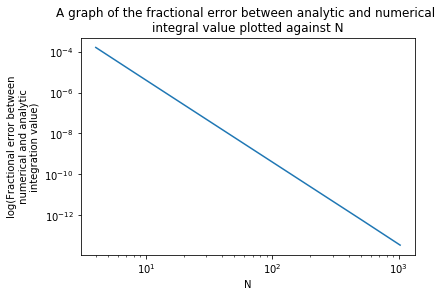

In [99]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
x_numerical = []
difference = []
for i in range(0, len(panel_counts)):
    x_numerical.append(integrate_numeric(x0, x1, panel_counts[i]))
    difference.append((abs(-x_numerical[i]+result_analytic))/result_analytic)
plt.xlabel('N')
plt.ylabel('log(Fractional error between\n numerical and analytic \nintegration value)')
plt.title('A graph of the fractional error between analytic and numerical \nintegral value plotted against N')
#plt.plot(numpy.log10(panel_counts), numpy.log10(difference))
plt.loglog(panel_counts, difference)


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels will increase the accuracy up to a certain point, when the number of panels gets very large, the accuracy will begin to decrease again for certain numerical methods. The accuracy will not be able to decrease past a certain limit. For higher order approximations, the accuracy will begin to worsen for smaller numbers of panels compared to lower order approximations. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing the panel count will increase the accuracy, the rate at which accuracy increases only seems to decrease when the number of panels is around 10^6. The reasoning for this is that the smaller then panel, the closer the sloped area on the trapezium will be to the gradient of the curve, meaning that the area of the trapezium will more closely match the area under the graph between the two selected points.